In [4]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
from matplotlib.ticker import ScalarFormatter

# 키워드 분석
from collections import Counter
from soynlp.tokenizer import LTokenizer


In [5]:
review = pd.read_csv('data/review_final.csv')
review['업소명'].value_counts()

업소명
나폴리농원                1500
센텀스파랜드               1420
포레스트 리솜 해브나인 힐링스파    1410
순천만국가정원              1390
차덕분                   748
한화리조트 거제 벨버디어         681
해비치 호텔&리조트 제주         546
대흥사                   437
서울한방진흥센터              367
Name: count, dtype: int64

In [6]:
# 데이터 불러오기
texts = review['리뷰'].dropna().tolist()
full_text = ' '.join(texts)

In [7]:
# 토큰화
tokenizer = LTokenizer()
tokens = tokenizer.tokenize(full_text)

In [22]:
# 불용어 제거
stopwords = set(['이', '가', '은', '는', '을', '를', '의', '에', '도', '으로', '한', '있어서', '있는', '와서', 'nan', '그리고', '하고', '있고', '조금', '때문', 'ㅎㅎ', '있어', '엄청', '정말', '진짜', '너무', '잘', '꼭', '이런', '거기', '저희'])  
tokens = [t for t in tokens if t not in stopwords and len(t) > 1]

In [20]:
# 단어 빈도수 계산
word_counts = Counter(tokens)
top50 = word_counts.most_common(50)
df_top50 = pd.DataFrame(top50, columns=['단어', '빈도수'])
print(df_top50)

        단어  빈도수
0      좋아요  815
1       좋은  503
2       좋고  498
3       많이  357
4     좋았어요  346
5       함께  335
6      사람이  326
7      많아서  266
8      모시고  246
9       힐링  239
10      다시  235
11      많고  224
12     부모님  211
13     맨발로  204
14    힐링하고  203
15     다음에  200
16      시간  198
17    좋아요.  196
18     왔는데  185
19   좋았어요.  178
20      넓고  176
21    깨끗하고  168
22      통영  167
23      모두  163
24     그래도  157
25    생각보다  155
26     제대로  153
27     아이와  149
28    아이들과  148
29     다양한  147
30     갔는데  144
31  좋았습니다.  144
32     좋아서  144
33     갑니다  143
34      같이  138
35     같아요  138
36      아주  137
37    오랜만에  130
38    피톤치드  127
39      여행  126
40     찜질방  126
41      오고  125
42     관리가  125
43    같아요.  124
44     시설도  124
45      특히  122
46      와서  120
47    가족들과  120
48    사람들이  120
49      좋을  119


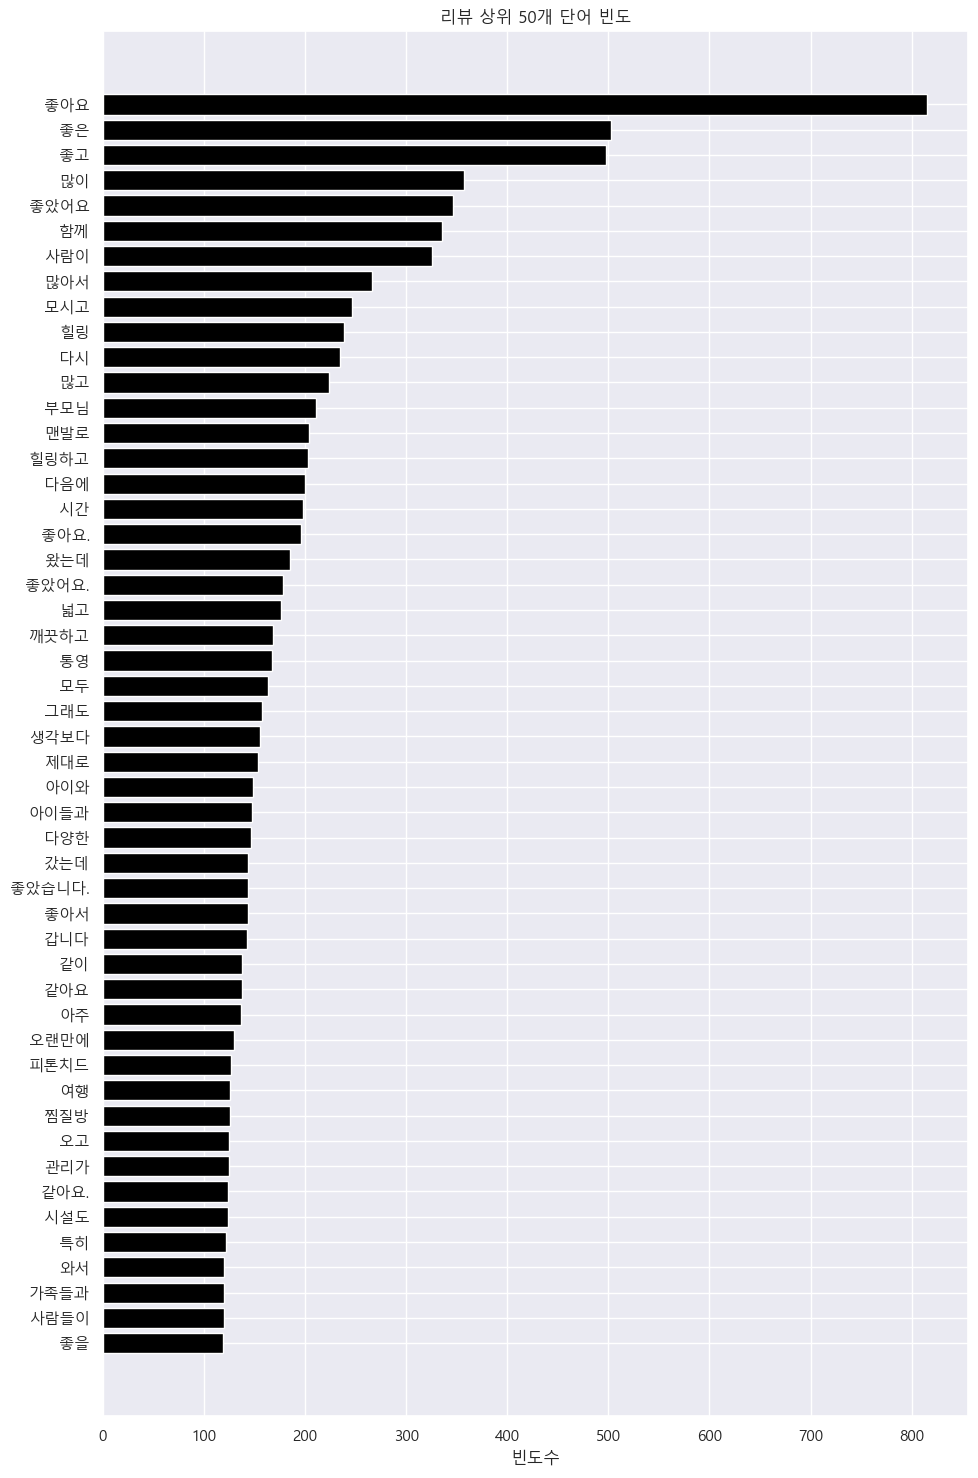

In [31]:
words, counts = zip(*top50)
plt.figure(figsize=(10, 15))
plt.barh(words[::-1], counts[::-1], color='black')
plt.xlabel('빈도수')
plt.title('리뷰 상위 50개 단어 빈도')
plt.tight_layout()
plt.show()